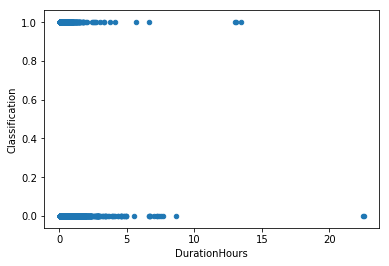

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
%matplotlib inline

df = pd.read_csv('./data/rentalTimeVsRiderType.csv')

df.plot.scatter(x='DurationHours', y='Classification');

In [27]:
durationHours = df['DurationHours']
classification = df['Classification']

rnd_indices = np.random.rand(len(durationHours)) < 0.80

train_x = durationHours[rnd_indices]
train_y = classification[rnd_indices]
test_x = durationHours[~rnd_indices]
test_y = classification[~rnd_indices]

learning_rate = 0.1
training_epochs = 10

X = tf.placeholder(tf.float32,[None,len(durationHours)])
Y = tf.placeholder(tf.float32,[None,2])
W = tf.Variable(tf.ones([n_dim,2]))

tf.global_variables_initializer()

<tf.Operation 'init_8' type=NoOp>

In [30]:
y_ = tf.nn.sigmoid(tf.matmul(X,W))
cost_function = tf.reduce_mean(tf.reduce_sum((-Y * tf.log(y_)) - ((1 - Y) * tf.log(1 - y_)), 
reduction_indices=[1]))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [31]:
cost_history = np.empty(shape=[1],dtype=float)
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        sess.run(optimizer,feed_dict={X:train_x,Y:train_y})
        cost_history = np.append(cost_history,sess.run(cost_function,
        	feed_dict={X: train_x,Y: train_y}))
    
    y_pred = sess.run(y_ , feed_dict={X: test_x})
    correct_prediction = tf.equal(tf.argmax(pred_y,1), tf.argmax(Y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy: ",(sess.run(accuracy, feed_dict={X: test_x, Y: test_y})))
    
    fig = plt.figure(figsize=(10,8))
    plt.plot(cost_history)
    plt.axis([0,training_epochs,0,np.max(cost_history)])
    plt.xlabel('# Iterations')
    plt.ylabel('Cost')
    plt.show()

ValueError: Cannot feed value of shape (10246,) for Tensor 'Placeholder_16:0', which has shape '(?, 12753)'